## Questions to answer:

"How much is quality of food weighed against other factors of the experience? (ambiance, service etc)"

"What is the most highly rated category of restaurant?"

"What restaurant categories don't exist in Vancouver?"

## Notes:
a quick google search says there are >5000 restaurants in vancouver.

using the yelp api, 3800 restaurants were able to be extracted, so about 75% of restaurants were found. API does not return businesses without any reviews, so that may be the cause for the missing data.

# Read in the data and convert it to dataframe

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from yelphelpers import *

with open('data/vancouver_restaurants.json') as f:
    data = json.load(f)
    
with open('data/categories.json') as f:
    cats = json.load(f)

In [307]:
df = pd.DataFrame.from_dict(data, orient='columns')

### Clean the data

Remove unnecessary data

One-hot encode categories list

Convert string data into numberic data (rating, price)

Add neighbourhood name based on zip code

In [308]:
# categories of restaurants in a list
restaurant_cats = [place['title'] for place in cats if 'restaurants' in place['parents']]

In [309]:
#  Remove unnecessary data
df = df.drop(columns=['image_url','is_closed','transactions','phone','display_phone'])

# TODO::: Expand the list, "categories" into separate columns
df_categories = df[['id', 'categories']]
df.drop(columns=['categories'],inplace=True)
df.rename(columns={'alias':'r_alias'},inplace=True)

df_categories = expand_list(df_categories,'categories')
df_categories = pd.concat([df_categories.drop(['categories'], axis=1), df_categories['categories'].apply(pd.Series)], axis=1)
df_categories = df_categories.groupby(['id']).agg(lambda x: tuple(x)).applymap(list).reset_index()

df = df.merge(df_alias_title, on='id')
df = df.drop('title', 1).join(df.title.str.join('|').str.get_dummies())

#____________________________________________________________________________
# df_alias_title = df[['id','alias','title']]
# df = expand_list(df,'categories')
# df.rename(columns={'alias':'r_alias'},inplace=True)
# df = pd.concat([df.drop(['categories'], axis=1), df['categories'].apply(pd.Series)], axis=1)
# df_alias_title = df[['id','alias','title']]
# df_alias_title = df_alias_title.groupby(['id']).agg(lambda x: tuple(x)).applymap(list).reset_index()
# df.drop(columns=['alias','title'],inplace=True)
# df = df.merge(df_alias_title, on='id')
# # One-hot encode categories to be able to be used
# df = df.drop('title', 1).join(df.title.str.join('|').str.get_dummies())
#____________________________________________________________________________

# replace number signs ($) with decimals
df.replace(['$','$$','$$$','$$$$'],[1.0,2.0,3.0,4.0], inplace=True)



In [320]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[df['id'] == '1tJ25j22FXmkuQQW0F_Qfg'])

                       id                                 r_alias  \
0  1tJ25j22FXmkuQQW0F_Qfg  afghan-horsemen-restaurant-vancouver-2   

                         name  \
0  Afghan Horsemen Restaurant   

                                                 url  review_count  rating  \
0  https://www.yelp.com/biz/afghan-horsemen-resta...           206     4.0   

                                         coordinates  price  \
0  {'latitude': 49.2694847203493, 'longitude': -1...    2.0   

                                            location     distance      alias  \
0  {'address1': '1833 Anderson Street', 'address2...  1773.077115  [afghani]   

   Acai Bowls  Afghan  African  Airport Lounges  American (New)  \
0           0       1        0                0               0   

   American (Traditional)  Arabian  Art Galleries  Arts & Entertainment  \
0                       0        0              0                     0   

   Asian Fusion  Australian  Austrian  Bagels  Bakeries  Bangla

### Summary Statistics

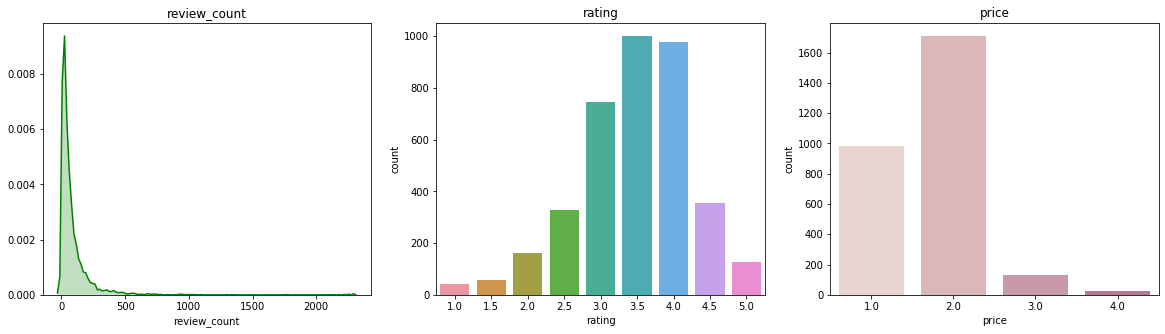

In [311]:
# review_count, rating, price

# review_count - line graph
# rating - histogram
# price - histogram

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.set_palette(sns.cubehelix_palette(8))
sns.distplot(df['review_count'], hist=False, color="g", ax=axes[0], kde_kws={"shade": True}).set_title('review_count')
sns.countplot(df['rating'],ax=axes[1]).set_title('rating')
sns.countplot(df['price'],ax=axes[2]).set_title('price')
plt.show()